# Print (subset of) 3D Oil concentration to CSV file 
This script is a very basic option for printing 3D oil concentrations to CSV file.
"Basic" in that the header information is simply "t,d,y,x" for "time, depth, y, x" and the values are all integer values. 

All of the 40 depth levels and 169 time intervals are included in output.  The x- and y-coordinates are trimmed to save space and concentrate on the regions of non-trivial values. 

In [1]:
import xarray as xr
import csv
import cmocean as cm
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, utilities

## Load data and display formatting

In [2]:
AKNS = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_05jun2015/Lagrangian_AKNS_crude_SOG_05jun15_12jun15_MediumFloater_AKNS_1000m3.nc')

In [3]:
AKNS

<xarray.Dataset>
Dimensions:              (grid_x: 396, grid_y: 896, grid_z: 40, time: 169)
Coordinates:
  * time                 (time) datetime64[ns] 2015-06-05T00:30:00 ...
  * grid_y               (grid_y) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * grid_x               (grid_x) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * grid_z               (grid_z) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
Data variables:
    OilConcentration_2D  (time, grid_y, grid_x) float64 ...
    Thickness_2D         (time, grid_y, grid_x) float64 ...
    Dissolution_3D       (time, grid_z, grid_y, grid_x) float64 ...
    OilConcentration_3D  (time, grid_z, grid_y, grid_x) float64 ...
    Beaching_Time        (grid_y, grid_x) datetime64[ns] ...
    Oil_Arrival_Time     (grid_y, grid_x) datetime64[ns] ...
Attributes:
    nco_openmp_thread_number:   1
    history:                    Wed Jun  5 08:46:16 2019: ncks -4 -L4 -A /loc...
    NCO:                        4.6.6
    history_of_appended_file

## Select the limited range of y=[250:600] and x = [200:350] and print to file

In [4]:
conc3d = AKNS.OilConcentration_3D[:,:,200:500,200:370].values

In [5]:
time = AKNS.time[0:168]
depth = AKNS.grid_z[0:39]
y = AKNS.grid_y[200:500]
x = AKNS.grid_x[200:370]

In [6]:
with open('3d_Oil_conc.csv','w') as csvfile:
    writer=csv.writer(csvfile, delimiter=',',lineterminator='\n',)
    writer.writerow("t" +"d"+"y"+"x")
    for it in range(len(time)):
        for iz in range(len(depth)):
            for iy in range(len(y)):
                for ix in range(len(x)):
                    writer.writerow([str(it.real), str(iz.real), iy.real, ix.real, conc3d[it,iz,iy,ix]])



## Plot up Oil Concentration 3D
First sum over depth and time to yield 2D view

In [7]:
conc3d_tz = conc3d.sum(0).sum(0)

In [8]:
conc3d_tz.shape


(300, 170)

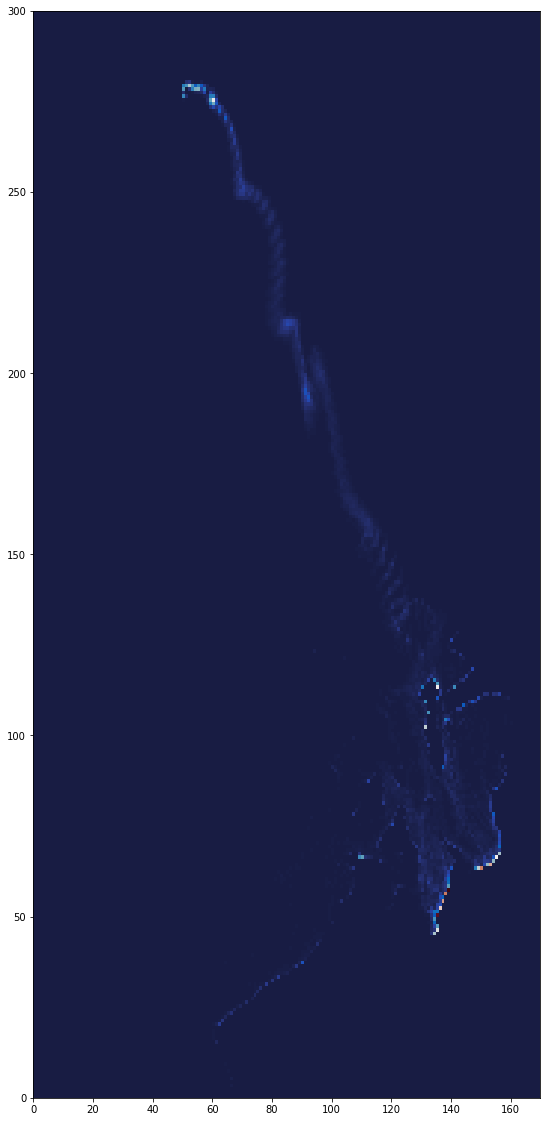

In [9]:
fs = 56
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
mappable = ax1.pcolormesh(conc3d_tz, cmap = cm.cm.balance)
